In [10]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value


- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n\n\n- Lavels structure all patiens with one value = list (no shape)'

In [11]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import multiprocessing
from xgboost import plot_tree
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
#用来计算程序运行时间
import datetime
starttime = datetime.datetime.now()

In [12]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEC.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EC.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

In [13]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [14]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [15]:
#Epoch (samples data point) all incluede for each subject <- + band + brain region (concatenated)

#All Epochs ! Majoriti points <- find a ave
a = np.array(withEpoch)
print(a.shape)
b = a.T
print(b.shape)
c2 = b.reshape(187,60)
print(c2.shape)

(12, 5, 187)
(187, 5, 12)
(187, 60)


In [16]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(type(Y[0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [17]:
# Training = normalise! - mean and standar desv.
# Test should be the same
New_Normalized = []
normalizedXtrain = preprocessing.normalize(c2)
#normalizedXtest = preprocessing.normalize(X_test)

In [18]:
Lavels3 =[]
X3 = []
r=0
for i  in range(0,len(xCorr)):
    if xCorr[i]>4.5 and r<35:
        Lavels3.append(int(0))
        X3.append(normalizedXtrain[i])
        r=r+1
    if xCorr[i]<=4.5:
        Lavels3.append(int(1))
        X3.append(normalizedXtrain[i])

****************************************************
0.1
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 0 0 0 1]
     Data:  [0 0 0 1 0 0]
     ACC 0.6666666666666666
     F1 0.0
     Recal 0.0
     Precision 0.0
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     **********************************

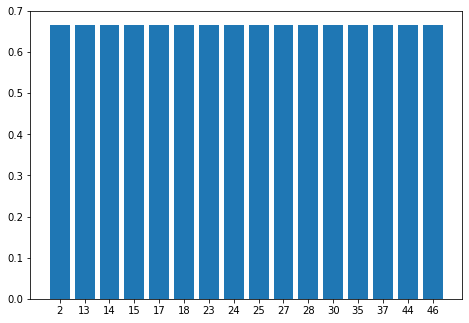

Num de acc que pasa de 0.5:  16
****************************************************
0.2
     ****************************************************
     Pred:  [0 1 0 0 0 0 0 0 1 0 0 1]
     Data:  [0 0 1 0 1 0 0 0 0 1 0 1]
     ACC 0.5833333333333334
     F1 0.28571428571428575
     Recal 0.25
     Precision 0.3333333333333333
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [1 1 1 1 0 1 0 0 0 0 0 0]
     Data:  [0 1 0 1 0 1 0 1 1 0 0 1]
     ACC 0.5833333333333334
     F1 0.5454545454545454
     Recal 0.5
     Precision 0.6
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 1 0 0 0 0 1 0 0 0 1]
     Data:  [1 0 1 0 1 0 1 0 0 0 0 1]
     ACC 0.6666666666666666
     F1 0.5
     Recal 0.4
     Precision 0.6666666666666666
     ****

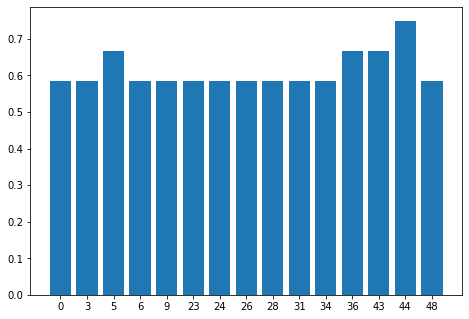

Num de acc que pasa de 0.5:  15
****************************************************
0.3
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0]
     Data:  [0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0]
     ACC 0.6666666666666666
     F1 0.5714285714285714
     Recal 0.5714285714285714
     Precision 0.5714285714285714
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1]
     Data:  [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0]
     ACC 0.5555555555555556
     F1 0.2
     Recal 0.3333333333333333
     Precision 0.14285714285714285
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0]
     Data:  [0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 

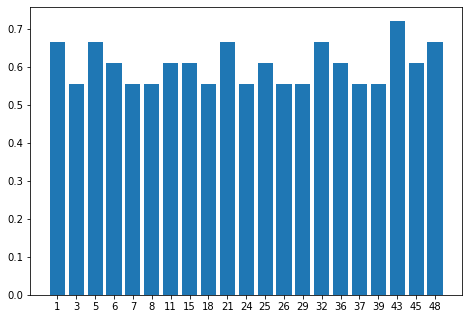

Num de acc que pasa de 0.5:  21
****************************************************
0.4
     ****************************************************
     Pred:  [0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
     Data:  [1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1]
     ACC 0.5833333333333334
     F1 0.37499999999999994
     Recal 0.2727272727272727
     Precision 0.6
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0]
     Data:  [1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0]
     ACC 0.7083333333333334
     F1 0.5333333333333333
     Recal 0.44444444444444

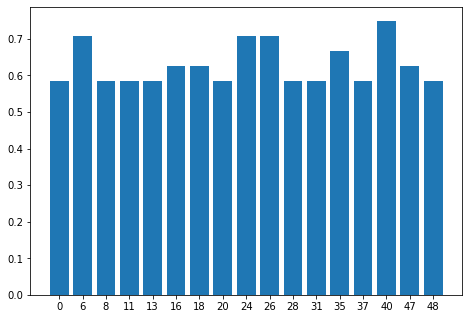

Num de acc que pasa de 0.5:  17
****************************************************
0.5
     ****************************************************
     Pred:  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     Data:  [1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0]
     ACC 0.5666666666666667
     F1 0.23529411764705882
     Recal 0.13333333333333333
     Precision 1.0
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
     Data:  [0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0]
     ACC 0.6
     F1 0.14285714285714288
     Recal 0.07692307692307693
     Precision 1.0
     *********

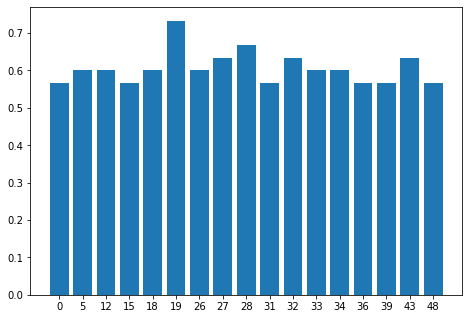

Num de acc que pasa de 0.5:  17
****************************************************
0.6
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
     Data:  [1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0]
     ACC 0.5555555555555556
     F1 0.2
     Recal 0.13333333333333333
     Precision 0.4
     ****************************************************
     Pred:  [1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0]
     Data:  [1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0]
     ACC 0.6111111111111112
     F1 0.5625
     Recal 0.6923076923076923
     Precision 0.47368421052631576
     ********************************

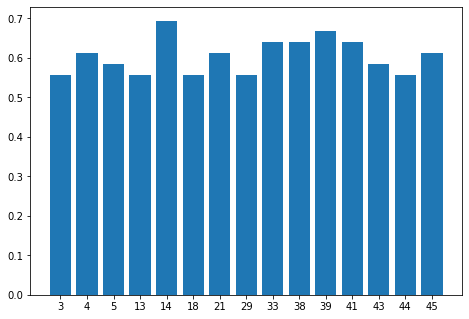

Num de acc que pasa de 0.5:  15
****************************************************
0.7
     ****************************************************
     Pred:  [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
     Data:  [0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0]
     ACC 0.5952380952380952
     F1 0.19047619047619047
     Recal 0.11764705882352941
     Precision 0.5
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Bad accu
     ****************************************************
     Pred:  [0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 

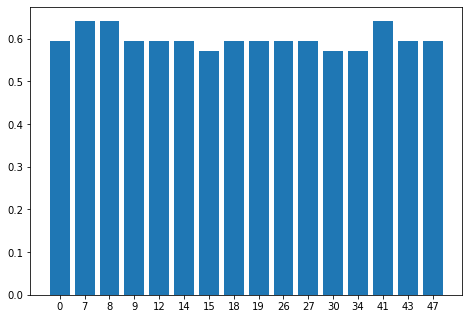

Num de acc que pasa de 0.5:  16


In [21]:
#https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png 

for i in range(1,8):
    print("****************************************************")
    print('0.'+str(i))
    numpase = 0
    accur = []
    xin = []
    for t in range(0,50):

        print("     ****************************************************")
        c = list(zip(X3, Lavels3))
        random.shuffle(c)

        DX, DY = zip(*c)
        DX = np.array(DX)
        DY = np.array(DY)
        trainX, testX, trainY, testY = train_test_split(DX, DY, test_size=float('0.'+str(i)))
        X_train = (trainX - np.mean(trainX)) / np.std(trainX)
        X_test = (testX - np.mean(testX)) / np.std(testX)

        xgb_model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=50,
                                        objective='binary:logistic',booster='gbtree',n_jobs=10,
                                        subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                        reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                        scale_pos_weight=1)
        xgb_model.fit(X_train,trainY)
        predY = xgb_model.predict(X_test)
        if float(accuracy_score(y_true=testY, y_pred=predY))>0.55:
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC",accuracy_score(y_true=testY, y_pred=predY))
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            numpase=numpase+1
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
            xin.append(str(t))
            
        else:
            print('     Bad accu')
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(xin,accur)
    plt.show()
    

    print('Num de acc que pasa de 0.5: ',numpase)

0.601765873015873

In [22]:
import plotly.express as px
from sklearn.decomposition import PCA

#Stander the features - but not the subjects. !!! <- in this plot

Y3 = np.array(Lavels3)
#Data
X3=np.array(X3)
pca = PCA()
components = pca.fit_transform(X3)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=Y3
)
fig.update_traces(diagonal_visible=False)
fig.show()